# k-Nearest Neighbors (kNN)

## Load Libraries


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier

## Load Processed Data


In [3]:
# Load the data
data = pd.read_csv(r'../resources/processed_data.csv')
data.head()

,Processed_Review,sentiment
0,one review mention watch oz episod hook right ...,positive
1,wonder littl product film techniqu unassum old...,positive
2,thought wonder way spend time hot summer weeke...,positive
3,basic famili littl boy jake think zombi closet...,negative
4,petter mattei love time money visual stun film...,positive


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [15]:
# Chuyển dữ liệu sang đặc trưng số sử dụng TF-IDF
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1, 2)) 
X = tfidf.fit_transform(data['Processed_Review']).toarray()
# Chia data thành các tập train và test
y = data['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

Tham số mô hình: n_neighbors = 500 , metric = cosine
Độ chính xác trên tập kiểm thử: 82.29%
Thời gian huấn luyện: 0.4599 giây
Thời gian dự đoán: 92.0735 giây

Bảng kết quả:

   n_neighbors  metric  accuracy  train_time (s)  predict_time (s)
0          500  cosine  0.822924        0.459903         92.073527


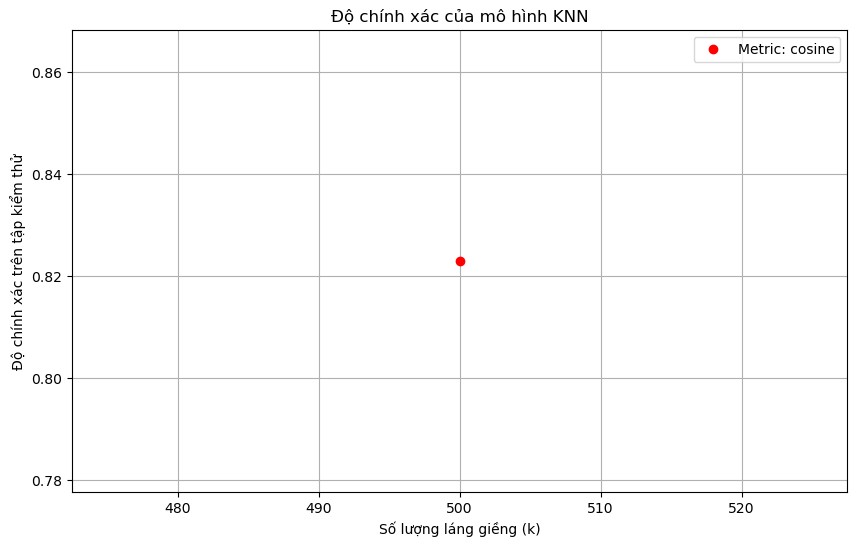

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import time  # Thêm thư viện để tính thời gian
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Giả sử X_train, X_test, y_train, y_test đã được định nghĩa

# Định nghĩa tham số của mô hình
n_neighbors = 500
metric = 'cosine'

# Khởi tạo mô hình KNN với tham số cố định
knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)

# Bắt đầu đo thời gian huấn luyện
start_time = time.time()

# Huấn luyện mô hình trên tập huấn luyện
knn.fit(X_train, y_train)

# Kết thúc đo thời gian huấn luyện
train_time = time.time() - start_time

# Bắt đầu đo thời gian dự đoán
start_time = time.time()

# Dự đoán trên tập kiểm thử
y_pred = knn.predict(X_test)

# Kết thúc đo thời gian dự đoán
predict_time = time.time() - start_time

# Tính độ chính xác trên tập kiểm thử
accuracy = accuracy_score(y_test, y_pred)

# In ra tham số, độ chính xác và thời gian chạy
print("Tham số mô hình: n_neighbors =", n_neighbors, ", metric =", metric)
print("Độ chính xác trên tập kiểm thử: {:.2f}%".format(accuracy * 100))
print("Thời gian huấn luyện: {:.4f} giây".format(train_time))
print("Thời gian dự đoán: {:.4f} giây".format(predict_time))

# Tạo DataFrame để hiển thị kết quả mô hình
results_df = pd.DataFrame({
    'n_neighbors': [n_neighbors],
    'metric': [metric],
    'accuracy': [accuracy],
    'train_time (s)': [train_time],
    'predict_time (s)': [predict_time]
})

# Hiển thị bảng kết quả
print("\nBảng kết quả:\n")
print(results_df)

# Vẽ biểu đồ độ chính xác của mô hình (nếu muốn kiểm thử nhiều n_neighbors hơn, có thể lặp qua các giá trị của n_neighbors)
plt.figure(figsize=(10, 6))
plt.plot([n_neighbors], [accuracy], label=f'Metric: {metric}', marker='o', linestyle='None', color='red')

plt.xlabel('Số lượng láng giềng (k)')
plt.ylabel('Độ chính xác trên tập kiểm thử')
plt.title('Độ chính xác của mô hình KNN')
plt.legend()
plt.grid(True)
plt.show()

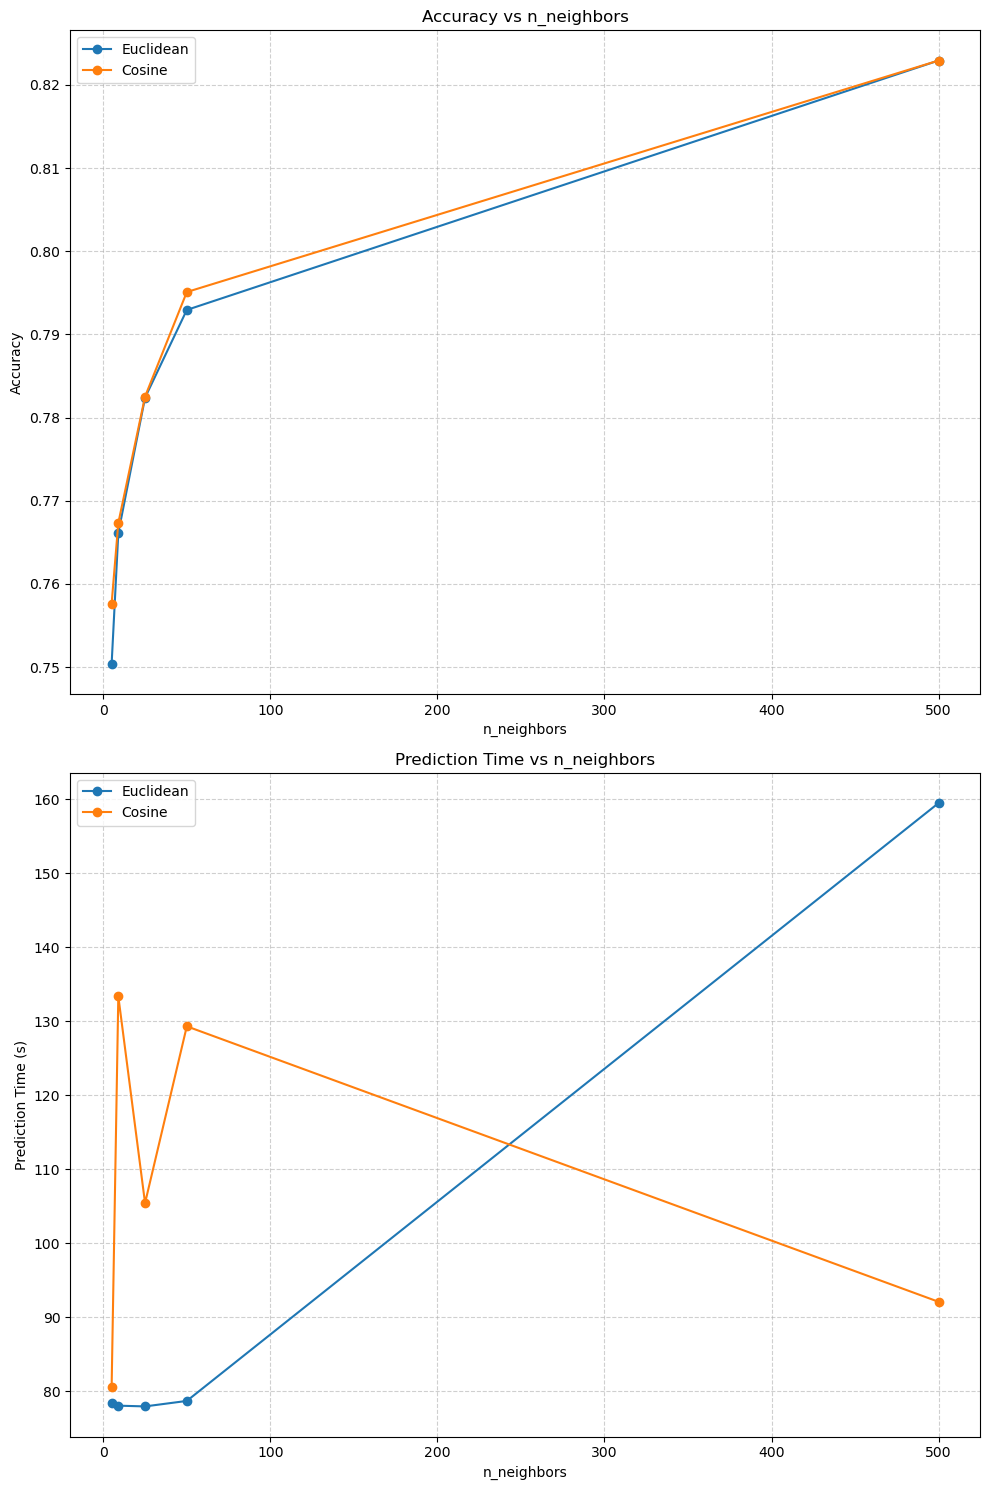

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Dữ liệu được cung cấp
data = {
    'n_neighbors': [5, 9, 25, 50, 500] * 2,
    'metric': ['euclidean'] * 5 + ['cosine'] * 5,
    'accuracy': [0.750387, 0.766118, 0.782387, 0.792941, 0.822924, 
                 0.757647, 0.767328, 0.782521, 0.795092, 0.822924],
    'predict_time (s)': [78.445463, 78.0451, 77.944483, 78.685566, 159.460342, 
                         80.569396, 133.361521, 105.409317, 129.290474, 92.073527]
}

# Chuyển đổi dữ liệu thành DataFrame
df = pd.DataFrame(data)

# Tách dữ liệu theo metric
euclidean_df = df[df['metric'] == 'euclidean']
cosine_df = df[df['metric'] == 'cosine']

# Vẽ các biểu đồ
fig, axes = plt.subplots(2, 1, figsize=(10, 15))

# Biểu đồ accuracy
axes[0].plot(euclidean_df['n_neighbors'], euclidean_df['accuracy'], label='Euclidean', marker='o')
axes[0].plot(cosine_df['n_neighbors'], cosine_df['accuracy'], label='Cosine', marker='o')
axes[0].set_title('Accuracy vs n_neighbors')
axes[0].set_xlabel('n_neighbors')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True, linestyle='--', alpha=0.6)

# Biểu đồ predict_time
axes[1].plot(euclidean_df['n_neighbors'], euclidean_df['predict_time (s)'], label='Euclidean', marker='o')
axes[1].plot(cosine_df['n_neighbors'], cosine_df['predict_time (s)'], label='Cosine', marker='o')
axes[1].set_title('Prediction Time vs n_neighbors')
axes[1].set_xlabel('n_neighbors')
axes[1].set_ylabel('Prediction Time (s)')
axes[1].legend()
axes[1].grid(True, linestyle='--', alpha=0.6)

# Điều chỉnh khoảng cách giữa các biểu đồ
plt.tight_layout()
plt.show()


## Word2Vec


In [6]:
import numpy as np
import pickle

# Tải dữ liệu huấn luyện
with open("../resources/X_w2v_train.pkl", "rb") as f:
    X_train = pickle.load(f)

# Tải dữ liệu kiểm tra
with open("../resources/X_w2v_test.pkl", "rb") as f:
    X_test = pickle.load(f)

# Tải nhãn huấn luyện
with open("../resources/y_train.pkl", "rb") as f:
    y_train = pickle.load(f)

# Tải nhãn kiểm tra
with open("../resources/y_test.pkl", "rb") as f:
    y_test = pickle.load(f)

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import time  # Thêm thư viện để tính thời gian
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

neighbor_list = [5, 9, 25, 50, 500]
metric_list = ['euclidean', 'cosine', 'manhattan']

for metric in metric_list:
    for n_neighbors in neighbor_list:
        # Khởi tạo mô hình KNN với tham số cố định
        knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)

        # Bắt đầu đo thời gian huấn luyện
        start_time = time.time()

        # Huấn luyện mô hình trên tập huấn luyện
        knn.fit(X_train, y_train)

        # Kết thúc đo thời gian huấn luyện
        train_time = time.time() - start_time

        # Bắt đầu đo thời gian dự đoán
        start_time = time.time()

        # Dự đoán trên tập kiểm thử
        y_pred = knn.predict(X_test)

        # Kết thúc đo thời gian dự đoán
        predict_time = time.time() - start_time

        # Tính độ chính xác trên tập kiểm thử
        accuracy = accuracy_score(y_test, y_pred)

        # In ra tham số, độ chính xác và thời gian chạy
        print("Tham số mô hình: n_neighbors =", n_neighbors, ", metric =", metric)
        print("Độ chính xác trên tập kiểm thử: {:.2f}%".format(accuracy * 100))
        print("Thời gian huấn luyện: {:.4f} giây".format(train_time))
        print("Thời gian dự đoán: {:.4f} giây".format(predict_time))

        # Tạo DataFrame để hiển thị kết quả mô hình
        results_df = pd.DataFrame({
            'n_neighbors': [n_neighbors],
            'metric': [metric],
            'accuracy': [accuracy],
            'train_time (s)': [train_time],
            'predict_time (s)': [predict_time]
        })

        # Hiển thị bảng kết quả
        print("\nBảng kết quả:\n")
        print(results_df)

Tham số mô hình: n_neighbors = 5 , metric = euclidean
Độ chính xác trên tập kiểm thử: 83.50%
Thời gian huấn luyện: 0.0649 giây
Thời gian dự đoán: 2.5251 giây

Bảng kết quả:

   n_neighbors     metric  accuracy  train_time (s)  predict_time (s)
0            5  euclidean     0.835        0.064861          2.525069
Tham số mô hình: n_neighbors = 9 , metric = euclidean
Độ chính xác trên tập kiểm thử: 84.00%
Thời gian huấn luyện: 0.0589 giây
Thời gian dự đoán: 2.5445 giây

Bảng kết quả:

   n_neighbors     metric  accuracy  train_time (s)  predict_time (s)
0            9  euclidean      0.84        0.058907          2.544505
Tham số mô hình: n_neighbors = 25 , metric = euclidean
Độ chính xác trên tập kiểm thử: 84.67%
Thời gian huấn luyện: 0.0666 giây
Thời gian dự đoán: 2.5452 giây

Bảng kết quả:

   n_neighbors     metric  accuracy  train_time (s)  predict_time (s)
0           25  euclidean  0.846733        0.066603          2.545245
Tham số mô hình: n_neighbors = 50 , metric = euclidean
Độ